In [143]:
include("parameters.jl")
include("estimation.jl")
include("inference.jl")
using StatsPlots

# Monte-Carlo Simulation of the Simple Test

Below are the results of a Monte-Carlo evaluation of our simple test for ordinal complementarity. To simplify, we consider only one period's worth of data. We first initialize a default set of parameters.

In [144]:
p = default_model()

(Π = [0.45 0.35 0.25; 0.24999999999999994 0.25 0.25; 0.30000000000000004 0.4 0.5;;; 0.35 0.25 0.15; 0.25 0.25 0.25; 0.4 0.5 0.6;;; 0.25 0.15 0.04999999999999999; 0.25 0.25 0.25; 0.5 0.6 0.7], π0 = [0.1111111111111111 0.1111111111111111 0.1111111111111111; 0.1111111111111111 0.1111111111111111 0.1111111111111111; 0.1111111111111111 0.1111111111111111 0.1111111111111111], P_I = [0.6 0.2 0.1; 0.2 0.6 0.2; 0.2 0.2 0.7], P_θ = [0.6 0.1 0.15; 0.2 0.7 0.15; 0.2 0.2 0.7], r_θ = 3, r_I = 3)

This model assumes $r_\theta=3$, $r_I=3$, and a pair of emission matrices $(P_I,P_\theta)$ that are each full-rank. We parameterize the transition matrix $\Pi$ as:

$$ P[\theta_{t+1}\leq \overline{\theta}_{k} | I_{t}, \theta_{t}] = c_{k} - \gamma_1\theta_{t} - \gamma_{2}I_{t} - \gamma_{3}\theta_{t}I_{t} $$

where vectors $\gamma$ and $c$ are chosen to ensure that all probabilities lie inside the unit interval. See [`parameters.jl`](parameters.jl) for more details on default parameter choices.

## Results at the boundary of $H_{0}$

Below we run the monte-carlo simulation for sample sizes of $N = (500,1000,5000,10000)$, with the null hypothesis correctly specified $(\gamma_{3}=0$).


In [145]:
sample_sizes = (500,1_000,5_000,10_000)
#sample_sizes = (500,500,500)
size_mc = zeros(4)
pl_test = plot(layout = (1,4))
Π0 = p.Π[1:2,:,:][:]
pl_est = plot((plot([Π0[j],Π0[j]],[0.,1.],color = "red") for j in (2,10,16) for k in 1:4)..., layout= (4,3),legend = false)

for n in eachindex(sample_sizes)
    seed0 = 1010 + n
    N = sample_sizes[n]
    size_mc[n], Tboot, cboot, Πboot = monte_carlo_simulation(p; N, nboot = 1_000,seed0)
    println("Finished Monte carlo for N = $N")
    histogram!(pl_test,Tboot, color = "blue",title = "N = $N",subplot=n,normalize = :probability,label = "test stat")
    histogram!(pl_test,cboot,color = "red",subplot=n,normalize = :probability,alpha = 0.4,label = "critical value")

    histogram!(pl_est,Πboot[2,:],normalize = :probability,subplot = (n-1)*3 + 1,alpha = 0.5,xlims = (0.,0.6),color="blue")
    histogram!(pl_est,Πboot[10,:],normalize = :probability,subplot = (n-1)*3 + 2,alpha = 0.5,xlims = (0.,0.6),color="blue")
    histogram!(pl_est,Πboot[16,:],normalize = :probability,subplot = (n-1)*3 + 3,alpha = 0.5,xlims = (0.,0.6),color="blue")
end

Finished Monte carlo for N = 500
Finished Monte carlo for N = 1000
Finished Monte carlo for N = 5000
Finished Monte carlo for N = 10000


First, a sanity check that our estimation is proceeding appropriately by checking the distribution of a handful of parameter estimates.

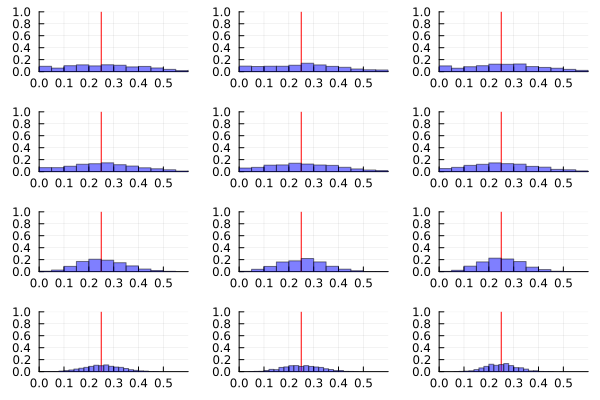

In [146]:
pl_est

Below is a histogram of the test statistic and the critical values for each simulation.

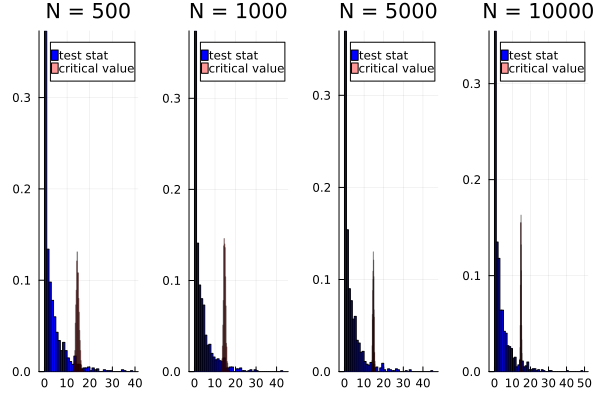

In [147]:
pl_test

And the simulated test size of the test for each sample size:

In [148]:
size_mc

4-element Vector{Float64}:
 0.048
 0.047
 0.046
 0.058

## TODO

Some items on the TODO list for simulation:

- Add a section for deviations from the Null hypothesis (using different values of $\gamma_{3}$)
- Add a section evaluating the size when $\Pi$ features complementarity "locally"